In [7]:
import math
import random
from queue import Queue

import matplotlib.pyplot as plt
import matplotlib.patches as patches

import matplotlib.colors as colors

# I create a class for each rectangle, containing the left bottom point as starting point, 
# the width and the height of each rectangle.
class Rect:
    def __init__(self, x, y, width, height):
        self.x = x
        self.y = y
        self.width = width
        self.height = height
        self.area = width * height

In [8]:
# Assign the color of rectangle in this order
colors ="bgrcmykw" 

In [9]:
# This function is used to find if two rectangles intersect or not
def isOverlap(r1, r2):
    if r1.x + r1.width <= r2.x or r2.x + r2.width <= r1.x or r1.y + r1.height <= r2.y or r2.y + r2.height <= r1.y:
        return False
    else:
        return True

In [10]:
# This function is used to draw specific rectangles when other functions call it.
# The first parameter specifies which figure will be plotted. The second and third parameters specify the size of 
# canvas to be painted. The fourth parameter is a list containing all of rectangles needed to paint on the canvas. The 
# fifth parameter is either a new coming rectangle or null. This parameter is designed because I need to paint the canvas 
# before the new rectangle is trimmed and the canvas after trimming.
def draw_rec(i, width, height, generatedRec, p3):
    arec = [] # Contains the rectangles ready to be painted
    idx = 0
    for rr in generatedRec:
        tmp1 = plt.Rectangle((rr.x, rr.y), rr.width, rr.height,edgecolor=colors[idx%8],linewidth=3,facecolor=colors[idx%8], alpha=0.1)
        arec.append(tmp1)
        idx += 1
    
    # Add the new coming rectangle into list if it is not null
    if p3 != None:
        tmp2 = plt.Rectangle((p3.x, p3.y), p3.width, p3.height, edgecolor=colors[idx%8],linewidth=3, facecolor=colors[idx % 8],alpha=0.1)
        arec.append(tmp2)

    fig = plt.figure(i)
    ax = fig.add_subplot(111)

    plt.xlim((0, width))
    plt.ylim((0, height))
    for ik in arec:
        ax.add_patch(ik)

    if p3 != None:
        plt.title('New tower comes')
    else:
        plt.title('After trimming')
    plt.show()

In [11]:
# This function contains main logic and algorithm of this project. This function generates the rectangle and trims 
# this new rectangle.
# The first two parameters are the size of the canvas which is set by the user, and the third parameter is the number
# of tower that the user wants to create.
def RecGenerate(width, height, amount = 5):
    generatedRec=[] # Contains all of the rectangles that have been generated and trimmed. 
    i = 0           # Indicates how many rectangles have been generated and the index of new generated rectangle
    
    area = 0
    # The while loop will not end until the target number of rectangles has been achieved.
    while i < amount:
        # Generate a new random rectangle. I don't choose random.randomInt() since random.sample() can offer me different 
        # random values in every loop.
        a_s = random.sample(range(1, width), 1)
        b_s = random.sample(range(1, height), 1)
        start_x_s = random.sample(range(1, width), 1)
        start_y_s = random.sample(range(1, height), 1)
        a = a_s[0]
        b = b_s[0]
        start_x = start_x_s[0]
        start_y = start_y_s[0]
        
        # The commented code below is the example provided in the assignment set.
        
        # a_s = [4, 3, 3, 6, 9]
        # b_s = [3, 2, 3, 6, 1]
        # start_x_s = [0, 2, 3, 2, 1]
        # start_y_s = [0, 2, 1, 2, 6]
        # a = a_s[i]
        # b = b_s[i]
        # start_x = start_x_s[i]
        # start_y = start_y_s[i]
    
        if start_x + a <= width and start_y + b <= height:
            p3 = Rect(start_x, start_y, a, b) # new rectangle
            if i != 0:
                draw_rec(2*i, width, height, generatedRec, p3)
            print(p3.x, p3.y, p3.width, p3.height)
            # The first rectangle doesn't have to be trimmed
            if len(generatedRec) == 0:
                generatedRec.append(p3)
                i = i + 1
                area += p3.area # update the occupied area
            else:
                # Use a queue to store each rectangle candidate
                queue = Queue() 
                queue.put(p3)
                # New coming rectangle needs to be trimmed after comparing with the rectangles generated before
                for p1 in generatedRec:
                    qsize = queue.qsize() # Store the size of queue so that each candidate knows which rectangle 
                                          # to compare
                    t = 0
                    while t < qsize:
                        p3 = queue.get()
                        # Trim the new rectangle. For this part, a document has been written in the github repo
                        if isOverlap(p3, p1):
                            if p1.x <= p3.x and p1.x+p1.width <= p3.x+p3.width and p1.y >= p3.y and p1.y+p1.height >= p3.y+p3.height:
                                r1 = Rect(p1.x+p1.width, p3.y, p3.x+p3.width-p1.x-p1.width, p3.height)
                                r2 = Rect(p3.x, p3.y, p3.width, p1.y-p3.y)
                                queue.put(r1) # Put the candidate into the queue
                                queue.put(r2)
                            elif p1.x <= p3.x and p1.x+p1.width <= p3.x+p3.width and p1.y <= p3.y and p1.y+p1.height <= p3.y+p3.height:
                                r1 = Rect(p3.x, p1.y+p1.height, p3.width, p3.y+p3.height-p1.y-p1.height)
                                r2 = Rect(p1.x+p1.width, p3.y, p3.x+p3.width-p1.x-p1.width, p3.height)
                                queue.put(r1)
                                queue.put(r2)
                            elif p1.x >= p3.x and p1.x+p1.width >= p3.x+p3.width and p1.y <= p3.y and p1.y+p1.height <= p3.y+p3.height:
                                r1 = Rect(p3.x, p3.y, p1.x-p3.x, p3.height)
                                r2 = Rect(p3.x, p1.y+p1.height, p3.width, p3.y+p3.height-p1.y-p1.height)
                                queue.put(r1)
                                queue.put(r2)
                            elif p1.x >= p3.x and p1.x+p1.width >= p3.x+p3.width and p1.y >= p3.y and p1.y+p1.height >= p3.y+p3.height:
                                r1 = Rect(p3.x, p3.y, p1.x-p3.x, p3.height)
                                r2 = Rect(p3.x, p3.y, p3.width, p1.y - p3.y)
                                queue.put(r1)
                                queue.put(r2)
                            elif p1.x <= p3.x and p1.x+p1.width >= p3.x+p3.width and p1.y >= p3.y and p1.y+p1.height >= p3.y+p3.height:
                                r = Rect(p3.x, p3.y, p3.width, p1.y-p3.y)
                                queue.put(r)
                            elif p1.x <= p3.x and p1.x+p1.width >= p3.x+p3.width and p1.y <= p3.y and p1.y+p1.height <= p3.y+p3.height:
                                r = Rect(p3.x, p1.y+p1.height, p3.width, p3.y+p3.height-p1.y-p1.height)
                                queue.put(r)
                            elif p1.x >= p3.x and p1.x+p1.width >= p3.x+p3.width and p1.y <= p3.y and p1.y+p1.height >= p3.y+p3.height:
                                r = Rect(p3.x, p3.y, p1.x-p3.x, p3.height)
                                queue.put(r)
                            elif p1.x <= p3.x and p1.x+p1.width <= p3.x+p3.width and p1.y <= p3.y and p1.y+p1.height >= p3.y+p3.height:
                                r = Rect(p1.x+p1.width, p3.y, p3.x+p3.width-p1.x-p1.width, p3.height)
                                queue.put(r)
                            elif p1.x <= p3.x and p1.x+p1.width >= p3.x+p3.width and p1.y <= p3.y and p1.y+p1.height >= p3.y+p3.height:
                                r = None
                                print('Unfortunately. New rectangle has been merged.')
                            elif p1.x >= p3.x and p1.x+p1.width <= p3.x+p3.width and p1.y >= p3.y and p1.y+p1.height <= p3.y+p3.height:
                                r1 = Rect(p3.x, p1.y+p1.height, p3.width, p3.y+p3.height-p1.y-p1.height)
                                r2 = Rect(p1.x+p1.width, p3.y, p3.x+p3.width-p1.x-p1.width, p3.height)
                                r3 = Rect(p3.x, p3.y, p3.width, p1.y-p3.y)
                                r4 = Rect(p3.x, p3.y, p1.x-p3.x, p3.height)
                                queue.put(r1)
                                queue.put(r2)
                                queue.put(r3)
                                queue.put(r4)
                            elif p1.x <= p3.x and p1.x+p1.width >= p3.x+p3.width and p1.y >= p3.y and p1.y+p1.height <= p3.y+p3.height:
                                r1 = Rect(p3.x, p3.y, p3.width, p1.y-p3.y)
                                r2 = Rect(p3.x, p1.y+p1.height, p3.width, p3.y+p3.height-p1.y-p1.height)
                                queue.put(r1)
                                queue.put(r2)
                            elif p1.x >= p3.x and p1.x+p1.width <= p3.x+p3.width and p1.y <= p3.y and p1.y+p1.height >= p3.y+p3.height:
                                r1 = Rect(p3.x, p3.y, p1.x-p3.x, p3.height)
                                r2 = Rect(p1.x+p1.width, p3.y, p3.x+p3.width-p1.x-p1.width, p3.height)
                                queue.put(r1)
                                queue.put(r2)
                            elif p1.x <= p3.x and p1.x+p1.width <= p3.x+p3.width and p1.y >= p3.y and p1.y+p1.height <= p3.y+p3.height:
                                r1 = Rect(p3.x, p1.y+p1.height, p3.width, p3.y+p3.height-p1.y-p1.height)
                                r2 = Rect(p3.x, p3.y, p3.width, p1.y-p3.y)
                                r3 = Rect(p1.x+p1.width, p3.y, p3.x+p3.width-p1.x-p1.width, p3.height)
                                queue.put(r1)
                                queue.put(r2)
                                queue.put(r3)
                            elif p1.x >= p3.x and p1.x+p1.width <= p3.x+p3.width and p1.y <= p3.y and p1.y+p1.height <= p3.y+p3.height:
                                r1 = Rect(p3.x, p3.y, p1.x-p3.x, p3.height)
                                r2 = Rect(p3.x, p1.y+p1.height, p3.width, p3.y+p3.height-p1.y-p1.height)
                                r3 = Rect(p1.x+p1.width, p3.y, p3.x+p3.width-p1.x-p1.width, p3.height)
                                queue.put(r1)
                                queue.put(r2)
                                queue.put(r3)
                            elif p1.x >= p3.x and p1.x+p1.width >= p3.x+p3.width and p1.y >= p3.y and p1.y+p1.height <= p3.y+p3.height:
                                r1 = Rect(p3.x, p1.y+p1.height, p3.width, p3.y+p3.height-p1.y-p1.height)
                                r2 = Rect(p3.x, p3.y, p1.x-p3.x, p3.height)
                                r3 = Rect(p3.x, p3.y, p3.width, p1.y-p3.y)
                                queue.put(r1)
                                queue.put(r2)
                                queue.put(r3)
                            elif p1.x >= p3.x and p1.x+p1.width <= p3.x+p3.width and p1.y >= p3.y and p1.y+p1.height >= p3.y+p3.height:
                                r1 = Rect(p3.x, p3.y, p1.x-p3.x, p3.height)
                                r2 = Rect(p3.x, p3.y, p3.width, p1.y-p3.y)
                                r3 = Rect(p1.x+p1.width, p3.y, p3.x+p3.width-p1.x-p1.width, p3.height)
                                queue.put(r1)
                                queue.put(r2)
                                queue.put(r3)
                            else:
                                print('Splitting goes wrong.')

                        else: # No overlap
                            queue.put(p3)
                        t += 1

                i = i + 1 # i used for tracking how many rectangles have been saved
                r = Rect(0,0,0,0)
                # Pick a candidate rectangle which has maximum area
                while not queue.empty():
                    r_tmp = queue.get()
                    if r_tmp.area >= r.area:
                        r = r_tmp

                area += r.area
                generatedRec.append(r)
                print('revised is ', r.x, r.y, r.width, r.height)

            draw_rec(2*i-1, width, height, generatedRec, None)
        # Random generated width or height goes beyond the border
        else:
            print('Index out of bound. Generate one more time.')
    return area

Index out of bound. Generate one more time.
Index out of bound. Generate one more time.
Index out of bound. Generate one more time.
Index out of bound. Generate one more time.
Index out of bound. Generate one more time.
Index out of bound. Generate one more time.
Index out of bound. Generate one more time.
6 9 3 1


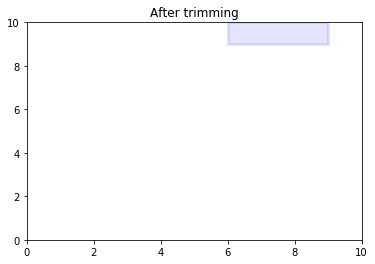

Index out of bound. Generate one more time.


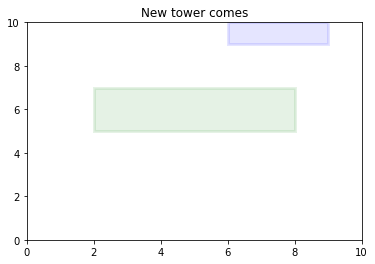

2 5 6 2
revised is  2 5 6 2


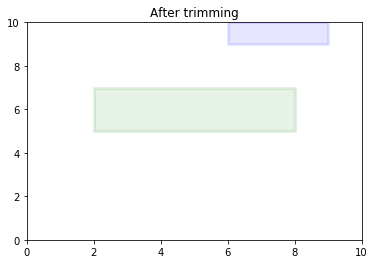

Index out of bound. Generate one more time.


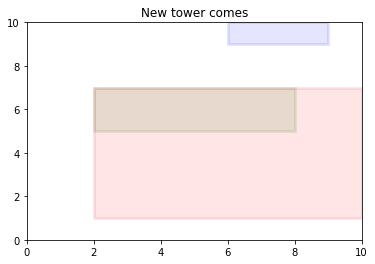

2 1 8 6
revised is  2 1 8 4


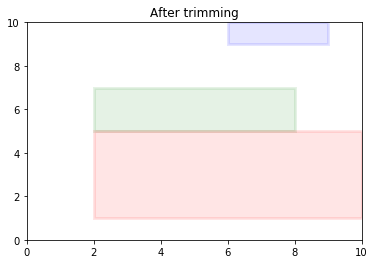

Index out of bound. Generate one more time.
Index out of bound. Generate one more time.
Index out of bound. Generate one more time.
Index out of bound. Generate one more time.
Index out of bound. Generate one more time.


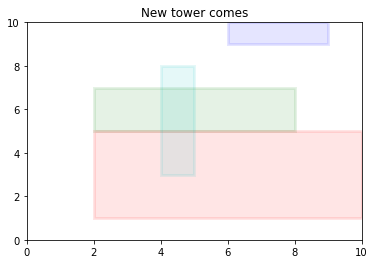

4 3 1 5
revised is  4 7 1 1


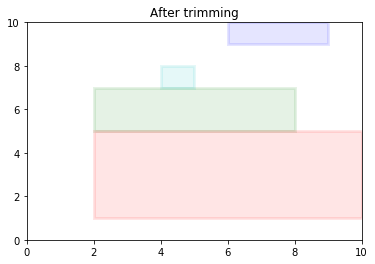

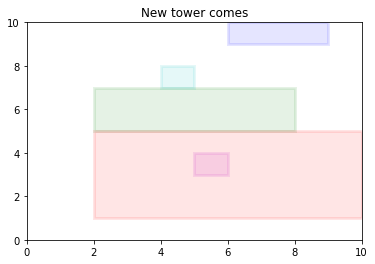

5 3 1 1
Unfortunately. New rectangle has been merged.
revised is  0 0 0 0


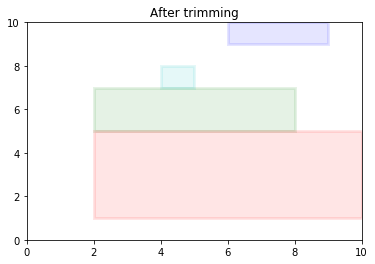

Index out of bound. Generate one more time.


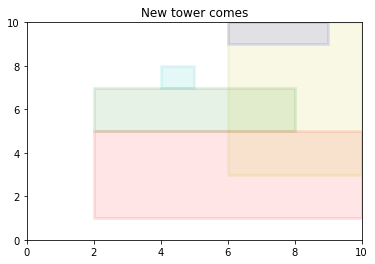

6 3 4 7
revised is  8 5 2 4


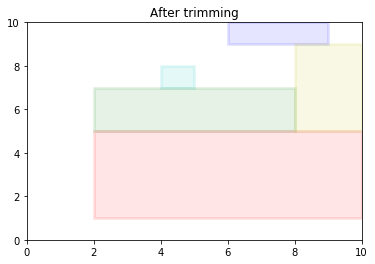

The total area of coverage is  56
Still have gaps!


In [15]:
# First question:

# Given an overall desired coverage footprint and a sequence of n communications
# towers, what is the resulting resolved coverage?

# The user can call this function to get the resulting resolved coverage. In particular, the first and the second
# parameters are the length and width of the space, and the third parameter is how many communication towers the user 
# wants to have. Since the result is visualized in the end, the user can clearly see the result after calling the 
# function like the one I provided below.
totalArea = RecGenerate(10, 10, 6)

# Second question:

# What is the total area of coverage relative to the desired total coverage area of the
# original footprint? That is, are there any gaps in coverage?

# The total area is obtained when we have a number returned by the calling function. By comparing total area 
# returned from the function and total area of space, we can know if there is any gaps left. If they are equal,
# no gaps left; otherwise, there is gaps inside the space. In the code below, I use 10*10 as the space area, since I
# I called the function by using 10 as width and 10 as length of the space. 
print('The total area of coverage is ', totalArea)

if totalArea == 10*10:
    print('No gaps in coverage!')
else:
    print('Still have gaps!')

In [ ]:
# On average, how many communications towers are required before full coverage is
# obtained?

# Answer: This answer can be various. In average, I have n*n/2 towers to cover the whole space.